In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Veremi_final_dataset.csv")   

print(df.info())  # Check column data types
print(df.head())  # Preview first few rows

# Check unique attack types
print(df["attack_type"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22165610 entries, 0 to 22165609
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   type         int64  
 2   rcvTime      float64
 3   pos_0        float64
 4   pos_1        float64
 5   pos_noise_0  float64
 6   pos_noise_1  float64
 7   spd_0        float64
 8   spd_1        float64
 9   spd_noise_0  float64
 10  spd_noise_1  float64
 11  acl_0        float64
 12  acl_1        float64
 13  acl_noise_0  float64
 14  acl_noise_1  float64
 15  hed_0        float64
 16  hed_1        float64
 17  hed_noise_0  float64
 18  hed_noise_1  float64
 19  attack       int64  
 20  attack_type  object 
dtypes: float64(17), int64(3), object(1)
memory usage: 3.5+ GB
None
   Unnamed: 0  type       rcvTime        pos_0       pos_1  pos_noise_0  \
0           0     3  27371.216284   981.098535  908.497891     3.826423   
1           1     3  52060.561117  1213.025174  984.277524     4.4774

In [2]:
print(df['attack_type'].value_counts()) 
print(df['type'].unique())
print(df.groupby('type')['attack'].value_counts())


attack_type
GridSybil             1246576
DoS                   1228655
DoSDisruptive         1224482
DoSRandom             1223169
DoSDisruptiveSybil    1185897
DoSRandomSybil        1185897
DataReplaySybil       1143918
DelayedMessages       1143918
ConstSpeedOffset      1143918
DataReplay            1143918
RandomSpeed           1143918
RandomPosOffset       1143918
RandomPos             1143918
Disruptive            1143918
EventualStop          1143918
ConstPos              1143918
ConstSpeed            1143918
ConstPosOffset        1143918
RandomSpeedOffset     1143918
Name: count, dtype: int64
[3 2]
type  attack
2     0          1694767
      1          1358508
3     0         10436543
      1          8675792
Name: count, dtype: int64


In [3]:
total_entries = df.shape[0]
print("Total entries in filtered_data:", total_entries)

Total entries in filtered_data: 22165610


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 Unnamed: 0     0
type           0
rcvTime        0
pos_0          0
pos_1          0
pos_noise_0    0
pos_noise_1    0
spd_0          0
spd_1          0
spd_noise_0    0
spd_noise_1    0
acl_0          0
acl_1          0
acl_noise_0    0
acl_noise_1    0
hed_0          0
hed_1          0
hed_noise_0    0
hed_noise_1    0
attack         0
attack_type    0
dtype: int64


In [5]:
# Check for duplicates in the filtered dataset
duplicates = df[df.duplicated()]

# Count the number of duplicate rows
duplicate_count = duplicates.shape[0]

print("Number of duplicate rows:", duplicate_count)
print("Duplicate rows:\n", duplicates)

Number of duplicate rows: 0
Duplicate rows:
 Empty DataFrame
Columns: [Unnamed: 0, type, rcvTime, pos_0, pos_1, pos_noise_0, pos_noise_1, spd_0, spd_1, spd_noise_0, spd_noise_1, acl_0, acl_1, acl_noise_0, acl_noise_1, hed_0, hed_1, hed_noise_0, hed_noise_1, attack, attack_type]
Index: []

[0 rows x 21 columns]


In [6]:
print(df.head())

   Unnamed: 0  type       rcvTime        pos_0       pos_1  pos_noise_0  \
0           0     3  27371.216284   981.098535  908.497891     3.826423   
1           1     3  52060.561117  1213.025174  984.277524     4.477449   
2           2     3  28156.319142   140.514133  944.338854     2.965184   
3           3     3  28671.375689   558.005547  327.316562     4.934159   
4           4     2  53612.000000   689.179631  547.143780     3.327547   

   pos_noise_1      spd_0     spd_1  spd_noise_0  ...     acl_0     acl_1  \
0     3.964059 -17.723786 -2.154895    -0.024182  ... -0.248402 -0.177659   
1     4.459375  14.504808  2.605276    -0.008523  ... -0.653850 -0.117125   
2     3.066191  -0.346027  4.671520    -0.000469  ...  0.333247 -4.486889   
3     5.037039  11.792797  4.028876     0.022346  ... -0.030639 -0.010265   
4     3.374621   3.887137 -8.732709     0.000090  ... -1.829939  4.111129   

   acl_noise_0   acl_noise_1     hed_0     hed_1  hed_noise_0  hed_noise_1  \
0     0.

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


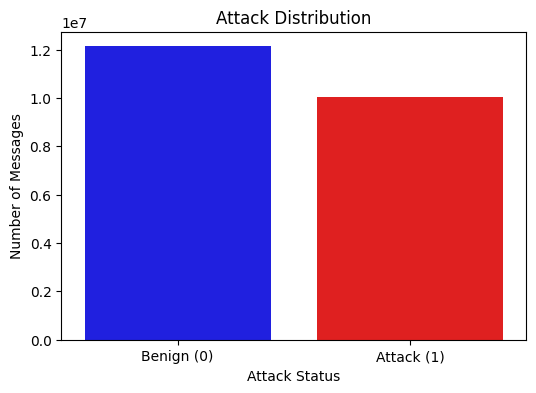

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count benign (0) and attack (1) messages
attack_counts = df['attack'].value_counts()

# Plot attack distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette=['blue', 'red'])
plt.xticks([0, 1], ['Benign (0)', 'Attack (1)'])
plt.ylabel('Number of Messages')
plt.xlabel('Attack Status')
plt.title('Attack Distribution')
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


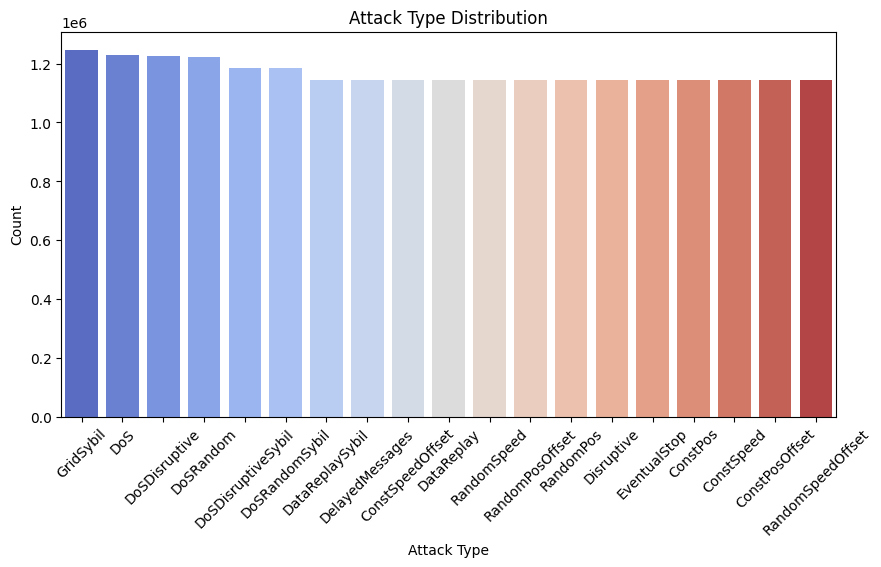

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='attack_type', order=df['attack_type'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Attack Type Distribution")
plt.show()

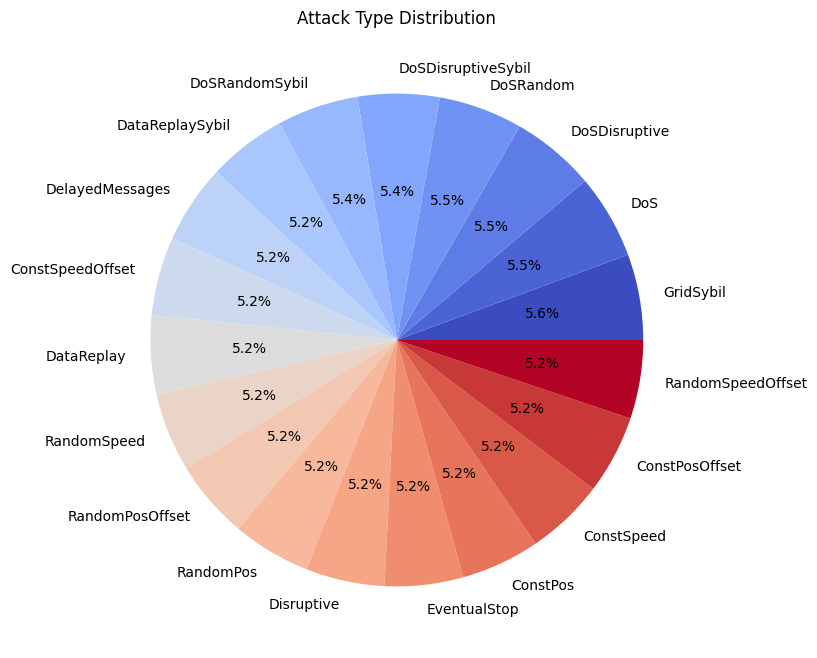

In [9]:
df['attack_type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), cmap='coolwarm')
plt.title("Attack Type Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()

In [10]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

# Select all numerical features (excluding categorical and time-related ones)
features_to_normalize = [
    'pos_0', 'pos_1', 'pos_noise_0', 'pos_noise_1', 
    'spd_0', 'spd_1', 'spd_noise_0', 'spd_noise_1', 
    'acl_0', 'acl_1', 'acl_noise_0', 'acl_noise_1', 
    'hed_0', 'hed_1', 'hed_noise_0', 'hed_noise_1'
]

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling only to numerical features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Verify normalization
print(df.head())


   Unnamed: 0  type       rcvTime     pos_0     pos_1  pos_noise_0  \
0           0     3  27371.216284  0.674022  0.544187     0.000274   
1           1     3  52060.561117  0.710519  0.559569     0.000321   
2           2     3  28156.319142  0.541743  0.551462     0.000212   
3           3     3  28671.375689  0.607442  0.426212     0.000353   
4           4     2  53612.000000  0.628084  0.470835     0.000238   

   pos_noise_1     spd_0     spd_1  spd_noise_0  ...     acl_0     acl_1  \
0     0.000284  0.163193  0.371885     0.390111  ...  0.472074  0.479971   
1     0.000319  0.630403  0.442812     0.474784  ...  0.427054  0.486693   
2     0.000220  0.415114  0.473600     0.518330  ...  0.536658  0.001455   
3     0.000361  0.591087  0.464024     0.641699  ...  0.496253  0.498560   
4     0.000242  0.476481  0.273874     0.521358  ...  0.296467  0.956217   

   acl_noise_0  acl_noise_1     hed_0     hed_1  hed_noise_0  hed_noise_1  \
0     0.006141     0.008928  0.014335  0.3811

In [11]:
# Noise reduction
# Apply a moving average filter to smooth noise
def moving_average(series, window_size=3):
    return series.rolling(window=window_size, min_periods=1).mean()

# Apply to selected numerical features
features_to_smooth = ['pos_0', 'pos_1', 'spd_0', 'spd_1', 'acl_0', 'acl_1']
for feature in features_to_smooth:
    df[feature] = moving_average(df[feature])

print(df.head())
print(df.shape)



   Unnamed: 0  type       rcvTime     pos_0     pos_1  pos_noise_0  \
0           0     3  27371.216284  0.674022  0.544187     0.000274   
1           1     3  52060.561117  0.692271  0.551878     0.000321   
2           2     3  28156.319142  0.642095  0.551739     0.000212   
3           3     3  28671.375689  0.619902  0.512414     0.000353   
4           4     2  53612.000000  0.592423  0.482837     0.000238   

   pos_noise_1     spd_0     spd_1  spd_noise_0  ...     acl_0     acl_1  \
0     0.000284  0.163193  0.371885     0.390111  ...  0.472074  0.479971   
1     0.000319  0.396798  0.407348     0.474784  ...  0.449564  0.483332   
2     0.000220  0.402903  0.429432     0.518330  ...  0.478595  0.322707   
3     0.000361  0.545535  0.460145     0.641699  ...  0.486655  0.328903   
4     0.000242  0.494228  0.403833     0.521358  ...  0.443126  0.485411   

   acl_noise_0  acl_noise_1     hed_0     hed_1  hed_noise_0  hed_noise_1  \
0     0.006141     0.008928  0.014335  0.3811

In [12]:
#Data Augmentation - Random Perturbation

import numpy as np

# Add random noise to suitable features
noise_factor = 0.01
noisy_features = ['pos_0', 'pos_1', 'spd_0', 'spd_1', 'acl_0', 'acl_1']
df[noisy_features] += noise_factor * np.random.normal(size=df[noisy_features].shape)

print(df.head())  # Verify augmented dataset




   Unnamed: 0  type       rcvTime     pos_0     pos_1  pos_noise_0  \
0           0     3  27371.216284  0.671505  0.520136     0.000274   
1           1     3  52060.561117  0.692568  0.551755     0.000321   
2           2     3  28156.319142  0.634308  0.550787     0.000212   
3           3     3  28671.375689  0.592830  0.512949     0.000353   
4           4     2  53612.000000  0.590575  0.476267     0.000238   

   pos_noise_1     spd_0     spd_1  spd_noise_0  ...     acl_0     acl_1  \
0     0.000284  0.158960  0.365369     0.390111  ...  0.473667  0.480255   
1     0.000319  0.391546  0.404605     0.474784  ...  0.447554  0.473846   
2     0.000220  0.409171  0.429974     0.518330  ...  0.472780  0.336080   
3     0.000361  0.539499  0.472207     0.641699  ...  0.486963  0.354515   
4     0.000242  0.502468  0.396957     0.521358  ...  0.452836  0.490056   

   acl_noise_0  acl_noise_1     hed_0     hed_1  hed_noise_0  hed_noise_1  \
0     0.006141     0.008928  0.014335  0.3811

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform `attack_type`
df['attack_type'] = label_encoder.fit_transform(df['attack_type'])

# Print mapping of original attack types to encoded values
attack_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Attack Type Encoding Mapping:")
for attack, encoded_value in attack_type_mapping.items():
    print(f"{attack} → {encoded_value}")



Attack Type Encoding Mapping:
ConstPos → 0
ConstPosOffset → 1
ConstSpeed → 2
ConstSpeedOffset → 3
DataReplay → 4
DataReplaySybil → 5
DelayedMessages → 6
Disruptive → 7
DoS → 8
DoSDisruptive → 9
DoSDisruptiveSybil → 10
DoSRandom → 11
DoSRandomSybil → 12
EventualStop → 13
GridSybil → 14
RandomPos → 15
RandomPosOffset → 16
RandomSpeed → 17
RandomSpeedOffset → 18


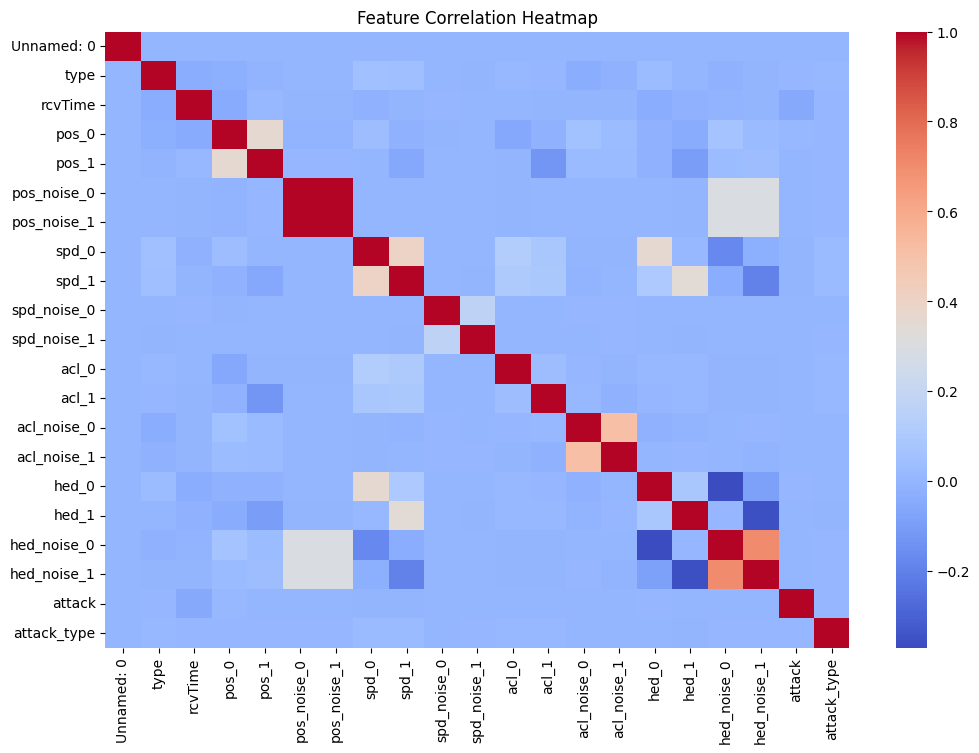

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
print(df.shape)

(22165610, 21)


In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = df.drop(columns=['attack'])
y = df['attack']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Save the preprocessed dataset
df.to_csv("preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved successfully.")

Preprocessed dataset saved successfully.
